In [1]:
import pandas as pd
file_path = "C:\\Users\\stann\\OneDrive\\Documents\\datasets\\Unicorn_Companies.csv"
unicorn_data = pd.read_csv(file_path)
unicorn_data.head(), unicorn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


(     Company Valuation Date Joined                         Industry  \
 0  Bytedance     $180B  2017-04-07          Artificial intelligence   
 1     SpaceX     $100B  2012-12-01                            Other   
 2      SHEIN     $100B  2018-07-03  E-commerce & direct-to-consumer   
 3     Stripe      $95B  2014-01-23                          Fintech   
 4     Klarna      $46B  2011-12-12                          Fintech   
 
             City        Country      Continent  Year Founded Funding  \
 0        Beijing          China           Asia          2012     $8B   
 1      Hawthorne  United States  North America          2002     $7B   
 2       Shenzhen          China           Asia          2008     $2B   
 3  San Francisco  United States  North America          2010     $2B   
 4      Stockholm         Sweden         Europe          2005     $4B   
 
                                     Select Investors  
 0  Sequoia Capital China, SIG Asia Investments, S...  
 1  Founders F

In [2]:
import numpy as np

# Replace 'Unknown' with NaN in the Funding column
unicorn_data['Funding'] = unicorn_data['Funding'].replace('Unknown', np.nan)

# Convert Funding column to numerical values
unicorn_data['Funding'] = unicorn_data['Funding'].replace({'\$': '', 'B': 'e9', 'M': 'e6'}, regex=True).astype(float)

unicorn_data.dtypes

<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
C:\Users\stann\AppData\Local\Temp\ipykernel_14324\2220640853.py:7: SyntaxWarning: invalid escape sequence '\$'
  unicorn_data['Funding'] = unicorn_data['Funding'].replace({'\$': '', 'B': 'e9', 'M': 'e6'}, regex=True).astype(float)


Company              object
Valuation            object
Date Joined          object
Industry             object
City                 object
Country              object
Continent            object
Year Founded          int64
Funding             float64
Select Investors     object
dtype: object

In [3]:
unicorn_data['Valuation'].unique()

# Replace any remaining non-numeric characters and convert to float
unicorn_data['Valuation'] = unicorn_data['Valuation'].replace({'\$': '', 'B': 'e9', 'M': 'e6', ',': ''}, regex=True).astype(float)

# Verify the conversion
print(unicorn_data['Valuation'].dtype)
print(unicorn_data['Valuation'].head())

float64
0    1.800000e+11
1    1.000000e+11
2    1.000000e+11
3    9.500000e+10
4    4.600000e+10
Name: Valuation, dtype: float64


<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
C:\Users\stann\AppData\Local\Temp\ipykernel_14324\3706539802.py:4: SyntaxWarning: invalid escape sequence '\$'
  unicorn_data['Valuation'] = unicorn_data['Valuation'].replace({'\$': '', 'B': 'e9', 'M': 'e6', ',': ''}, regex=True).astype(float)


In [4]:
# Identify non-numeric entries in the Valuation column
non_numeric_valuations = unicorn_data[~unicorn_data['Valuation'].apply(lambda x: isinstance(x, (int, float)))]
print(non_numeric_valuations)

# Manually clean or remove problematic entries
unicorn_data = unicorn_data.drop(non_numeric_valuations.index)
unicorn_data['Valuation'] = unicorn_data['Valuation'].astype(float)


Empty DataFrame
Columns: [Company, Valuation, Date Joined, Industry, City, Country, Continent, Year Founded, Funding, Select Investors]
Index: []


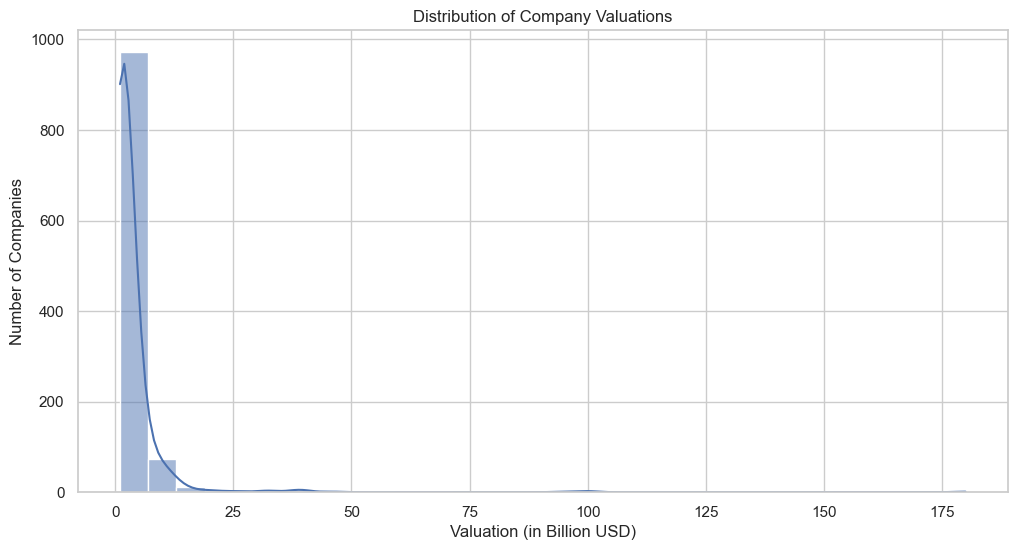

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(unicorn_data['Valuation'] / 1e9, bins=30, kde=True)
plt.xlabel('Valuation (in Billion USD)')
plt.ylabel('Number of Companies')
plt.title('Distribution of Company Valuations')
plt.show()


C:\Users\stann\AppData\Local\Temp\ipykernel_8500\2944598474.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_company.values, y=top_company.index, palette='viridis')


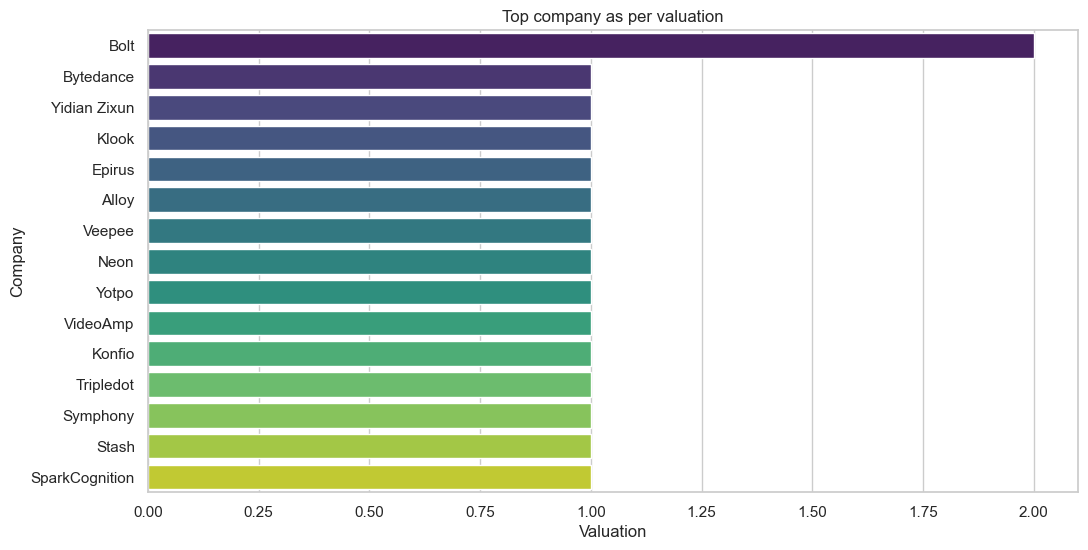

In [14]:
top_company = unicorn_data['Company'].value_counts().head(15)
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=top_company.values, y=top_company.index, palette='viridis')
plt.title('Top company as per valuation')
plt.xlabel('Valuation')
plt.ylabel('Company')
plt.show()

C:\Users\stann\AppData\Local\Temp\ipykernel_8500\3295627751.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_counts.values, y=industry_counts.index, palette='viridis')


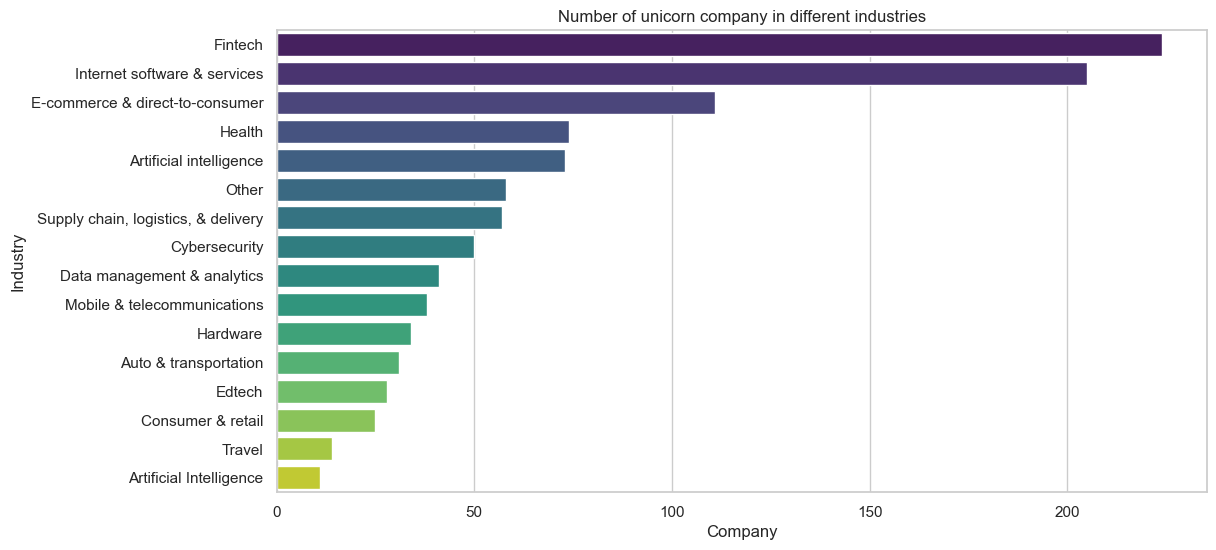

In [9]:
industry_counts = unicorn_data['Industry'].value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=industry_counts.values, y=industry_counts.index, palette='viridis')
plt.title('Number of unicorn company in different industries')
plt.xlabel('Company')
plt.ylabel('Industry')
plt.show()

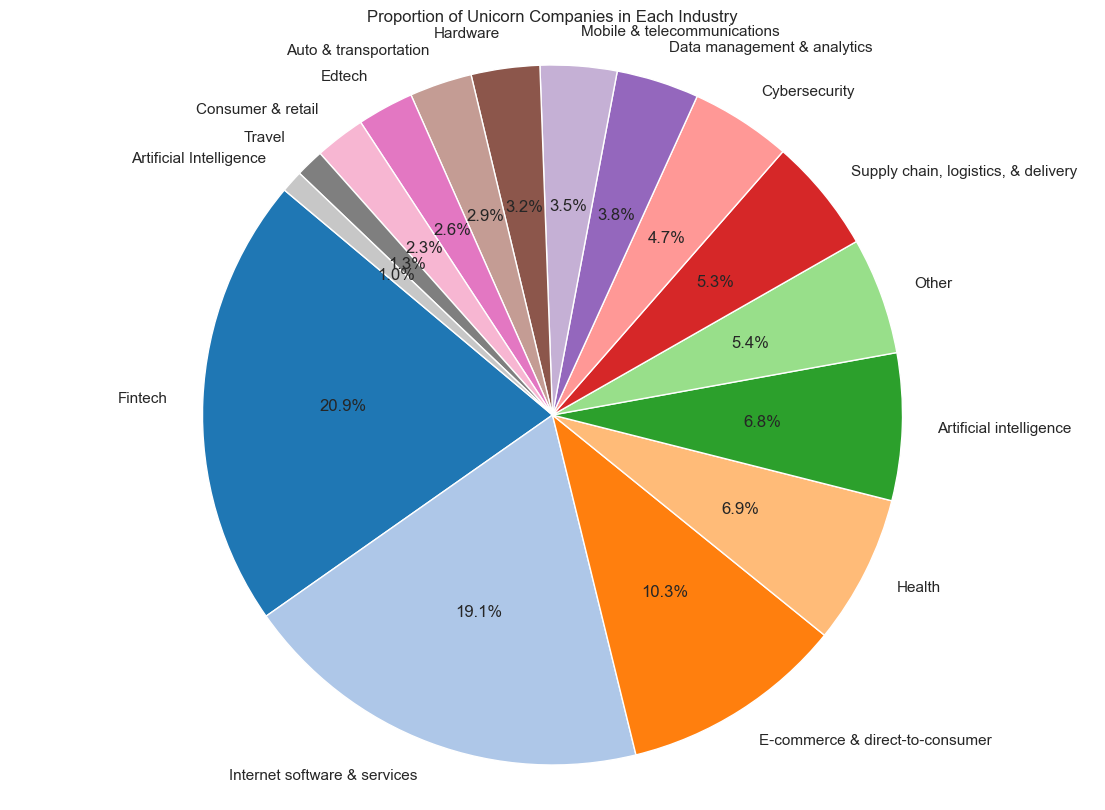

In [18]:
import matplotlib.pyplot as plt

# Count the number of companies per industry
industry_counts = unicorn_data['Industry'].value_counts()

# Plot the proportion of unicorn companies in each industry as a pie chart
plt.figure(figsize=(14, 10))
plt.pie(industry_counts, labels=industry_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('tab20', len(industry_counts)))
plt.title('Proportion of Unicorn Companies in Each Industry')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


C:\Users\stann\AppData\Local\Temp\ipykernel_8500\4260659438.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_valuation.values / 1e9, y=industry_valuation.index, palette='tab20')


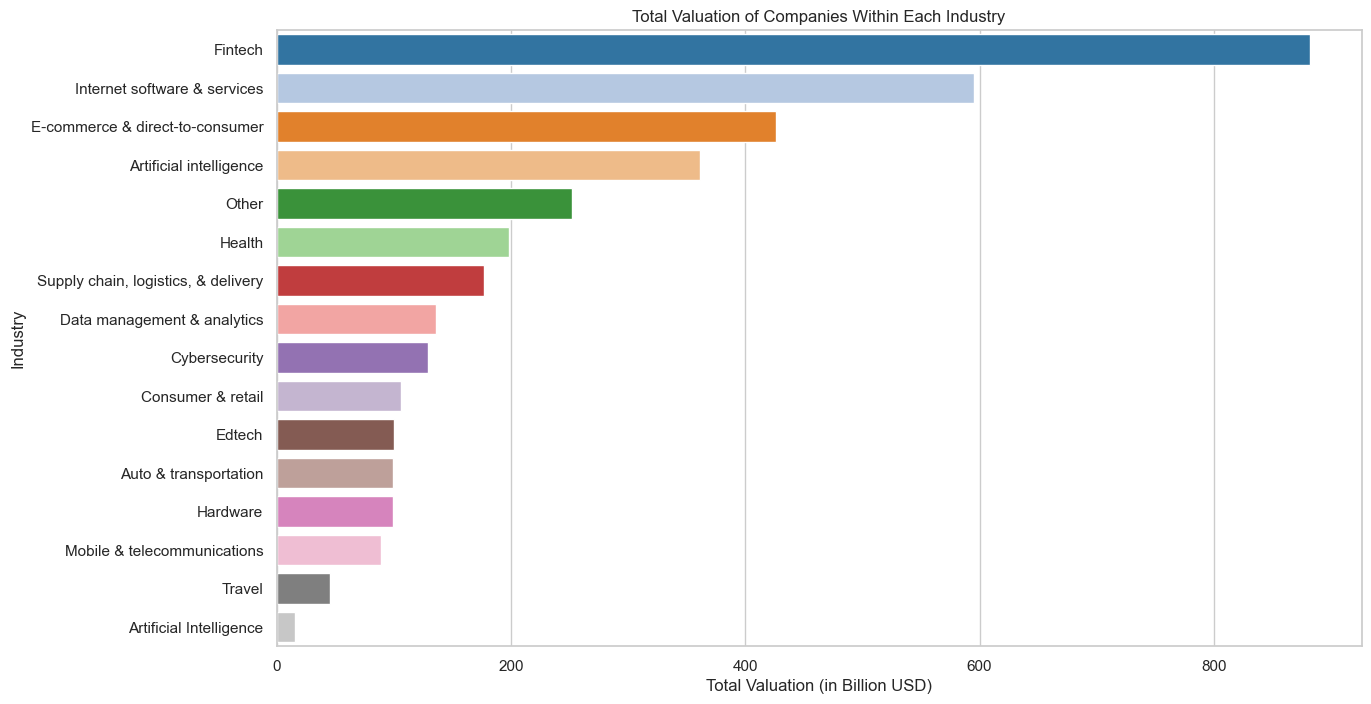

In [19]:
industry_valuation = unicorn_data.groupby('Industry')['Valuation'].sum().sort_values(ascending=False)
sns.set(style="whitegrid")

# Plot the total valuation of companies within each industry
plt.figure(figsize=(14, 8))
sns.barplot(x=industry_valuation.values / 1e9, y=industry_valuation.index, palette='tab20')
plt.xlabel('Total Valuation (in Billion USD)')
plt.ylabel('Industry')
plt.title('Total Valuation of Companies Within Each Industry')
plt.show()


In [20]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


<>:9: SyntaxWarning: invalid escape sequence '\$'
<>:10: SyntaxWarning: invalid escape sequence '\$'
<>:9: SyntaxWarning: invalid escape sequence '\$'
<>:10: SyntaxWarning: invalid escape sequence '\$'
C:\Users\stann\AppData\Local\Temp\ipykernel_8500\3318130742.py:9: SyntaxWarning: invalid escape sequence '\$'
  unicorn_data['Valuation'] = unicorn_data['Valuation'].replace({'\$': '', 'B': 'e9', 'M': 'e6', ',': ''}, regex=True).astype(float)
C:\Users\stann\AppData\Local\Temp\ipykernel_8500\3318130742.py:10: SyntaxWarning: invalid escape sequence '\$'
  unicorn_data['Funding'] = unicorn_data['Funding'].replace('Unknown', np.nan).replace({'\$': '', 'B': 'e9', 'M': 'e6', ',': ''}, regex=True).astype(float)


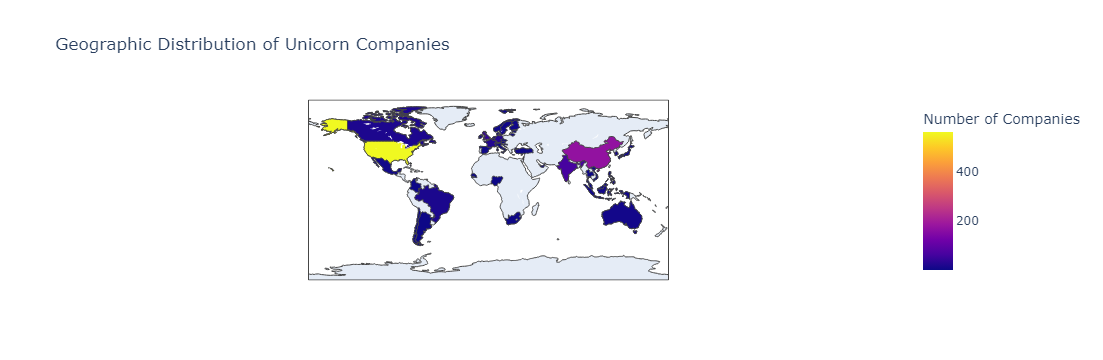

In [21]:
import pandas as pd
import plotly.express as px

# Load the dataset
file_path = 'C:\\Users\\stann\\OneDrive\\Documents\\datasets\\Unicorn_Companies.csv'
unicorn_data = pd.read_csv(file_path)

# Clean the data: remove non-numeric characters and convert to float
unicorn_data['Valuation'] = unicorn_data['Valuation'].replace({'\$': '', 'B': 'e9', 'M': 'e6', ',': ''}, regex=True).astype(float)
unicorn_data['Funding'] = unicorn_data['Funding'].replace('Unknown', np.nan).replace({'\$': '', 'B': 'e9', 'M': 'e6', ',': ''}, regex=True).astype(float)
unicorn_data['Date Joined'] = pd.to_datetime(unicorn_data['Date Joined'])

# Group the data by country and count the number of companies
country_counts = unicorn_data['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Number of Companies']

# Create the choropleth map
fig = px.choropleth(
    country_counts,
    locations="Country",
    locationmode='country names',
    color="Number of Companies",
    hover_name="Country",
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Geographic Distribution of Unicorn Companies'
)

fig.show()


<>:1: SyntaxWarning:

invalid escape sequence '\$'

<>:2: SyntaxWarning:

invalid escape sequence '\$'

<>:1: SyntaxWarning:

invalid escape sequence '\$'

<>:2: SyntaxWarning:

invalid escape sequence '\$'

C:\Users\stann\AppData\Local\Temp\ipykernel_8500\3637678540.py:1: SyntaxWarning:

invalid escape sequence '\$'

C:\Users\stann\AppData\Local\Temp\ipykernel_8500\3637678540.py:2: SyntaxWarning:

invalid escape sequence '\$'

C:\Users\stann\AppData\Local\Temp\ipykernel_8500\3637678540.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Number of Unicorn Companies by Country:
          Country  Number of Companies
0   United States                  562
1           China                  173
2           India                   65
3  United Kingdom                   43
4         Germany                   26
5          France                   24
6          Israel                   20
7          Canada                   19
8          Brazil                   16
9       Singapore                   12

Number of Unicorn Companies by Continent:
       Continent  Number of Companies
0  North America                  589
1           Asia                  310
2         Europe                  143
3  South America                   21
4        Oceania                    8
5         Africa                    3


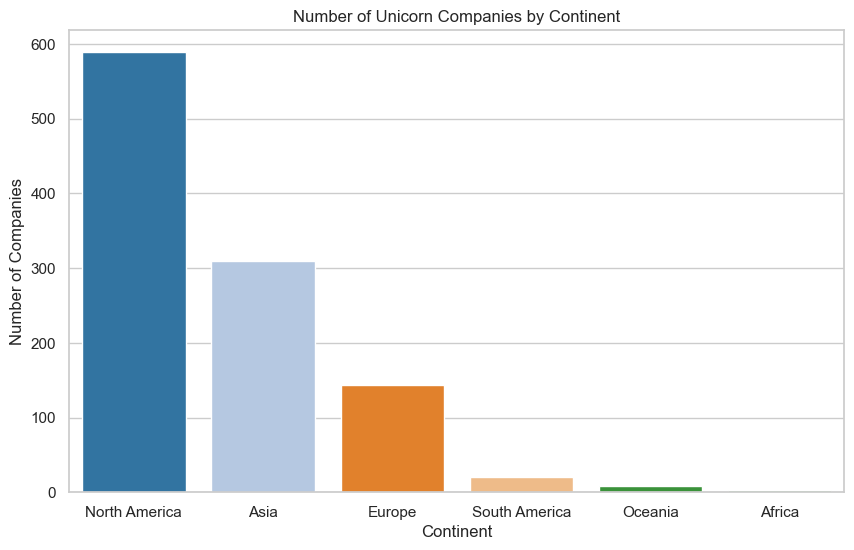

C:\Users\stann\AppData\Local\Temp\ipykernel_8500\3637678540.py:31: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




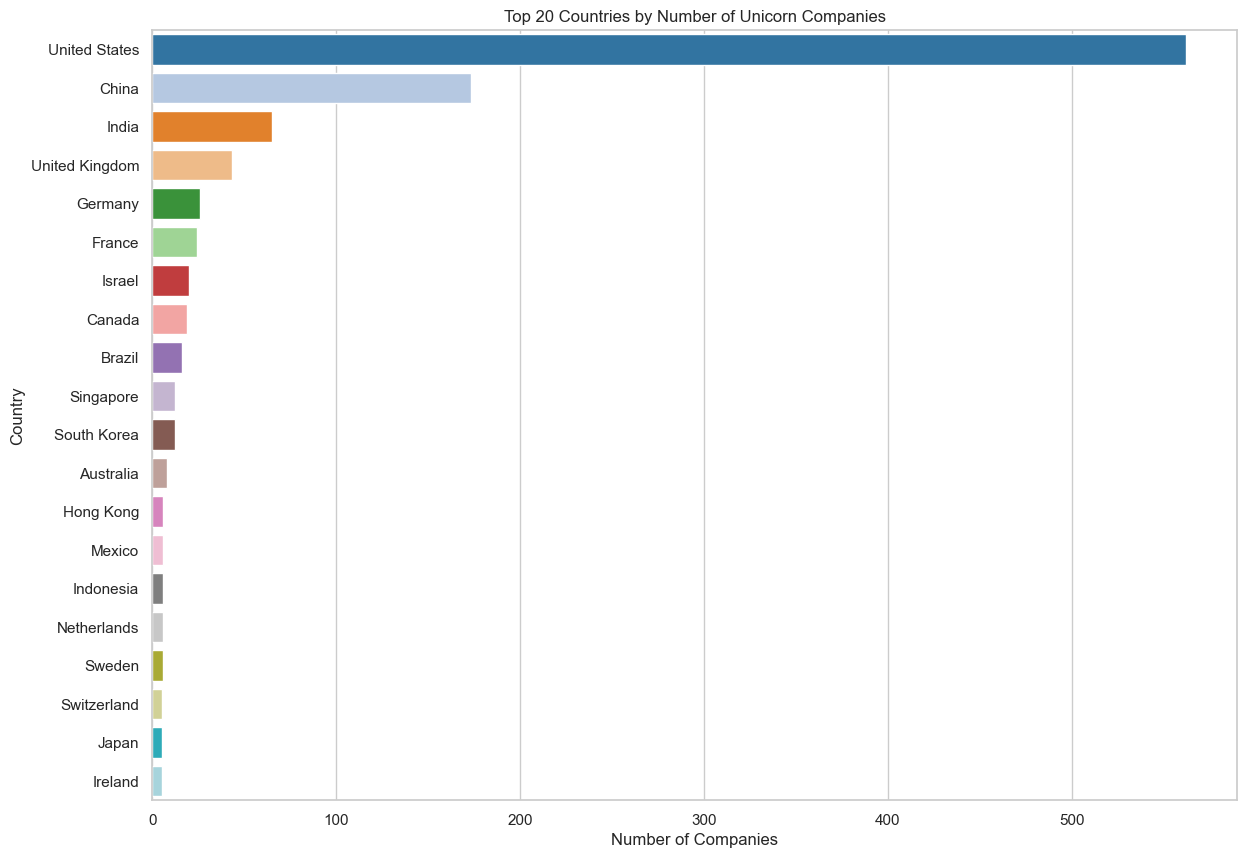

In [22]:
unicorn_data['Valuation'] = unicorn_data['Valuation'].replace({'\$': '', 'B': 'e9', 'M': 'e6', ',': ''}, regex=True).astype(float)
unicorn_data['Funding'] = unicorn_data['Funding'].replace('Unknown', np.nan).replace({'\$': '', 'B': 'e9', 'M': 'e6', ',': ''}, regex=True).astype(float)
unicorn_data['Date Joined'] = pd.to_datetime(unicorn_data['Date Joined'])

# Summary table: number of companies by country and continent
country_counts = unicorn_data['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Number of Companies']
continent_counts = unicorn_data['Continent'].value_counts().reset_index()
continent_counts.columns = ['Continent', 'Number of Companies']

# Display summary tables
print("Number of Unicorn Companies by Country:")
print(country_counts.head(10))  # Display top 10 countries

print("\nNumber of Unicorn Companies by Continent:")
print(continent_counts)

# Set the style for the plots
sns.set(style="whitegrid")

# Bar Chart: Number of Companies by Continent
plt.figure(figsize=(10, 6))
sns.barplot(x=continent_counts['Continent'], y=continent_counts['Number of Companies'], palette='tab20')
plt.xlabel('Continent')
plt.ylabel('Number of Companies')
plt.title('Number of Unicorn Companies by Continent')
plt.show()

# Bar Chart: Number of Companies by Country
plt.figure(figsize=(14, 10))
sns.barplot(x=country_counts['Number of Companies'].head(20), y=country_counts['Country'].head(20), palette='tab20')
plt.xlabel('Number of Companies')
plt.ylabel('Country')
plt.title('Top 20 Countries by Number of Unicorn Companies')
plt.show()

C:\Users\stann\AppData\Local\Temp\ipykernel_8500\419730143.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




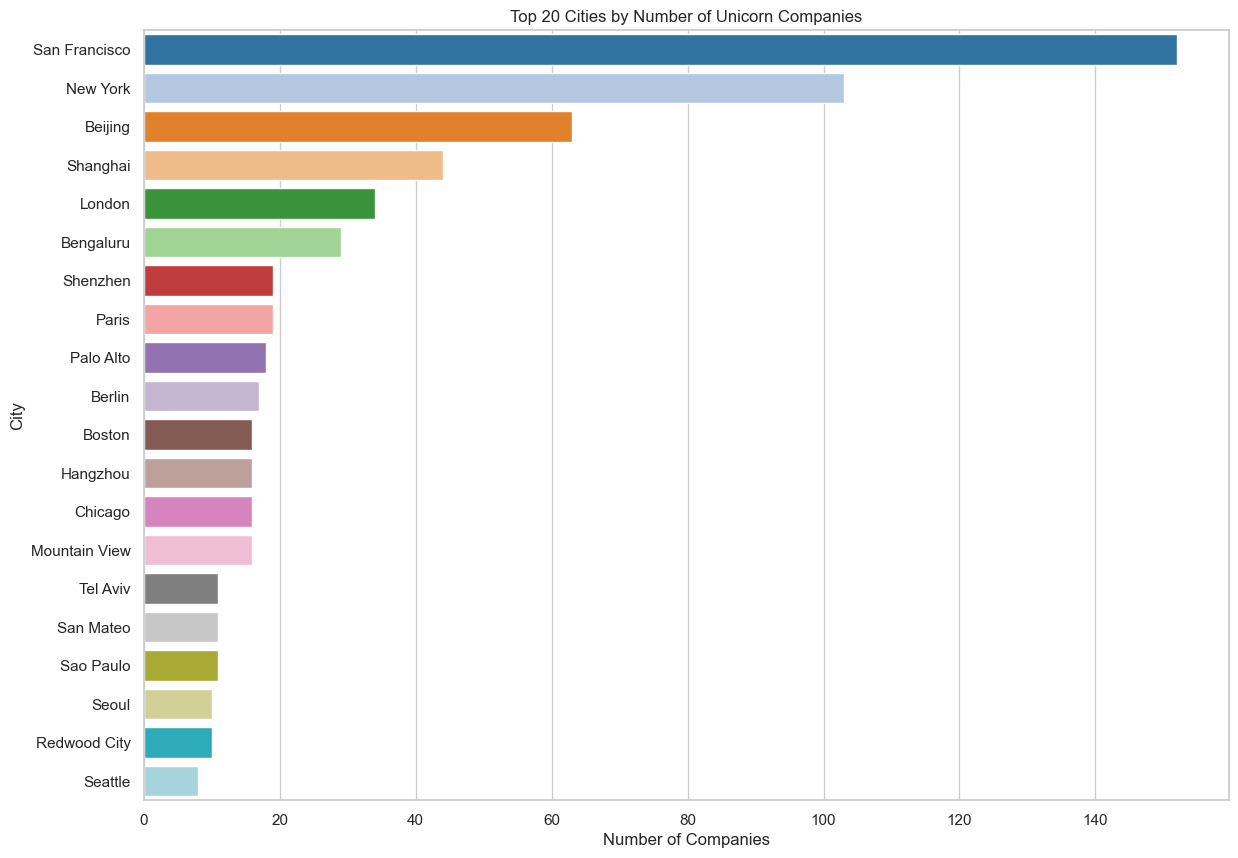

In [23]:
city_counts = unicorn_data['City'].value_counts().reset_index()
city_counts.columns = ['City', 'Number of Companies']

# Set the style for the plots
sns.set(style="whitegrid")

# Plot the number of unicorn companies in each city
plt.figure(figsize=(14, 10))
sns.barplot(x=city_counts['Number of Companies'].head(20), y=city_counts['City'].head(20), palette='tab20')
plt.xlabel('Number of Companies')
plt.ylabel('City')
plt.title('Top 20 Cities by Number of Unicorn Companies')
plt.show()

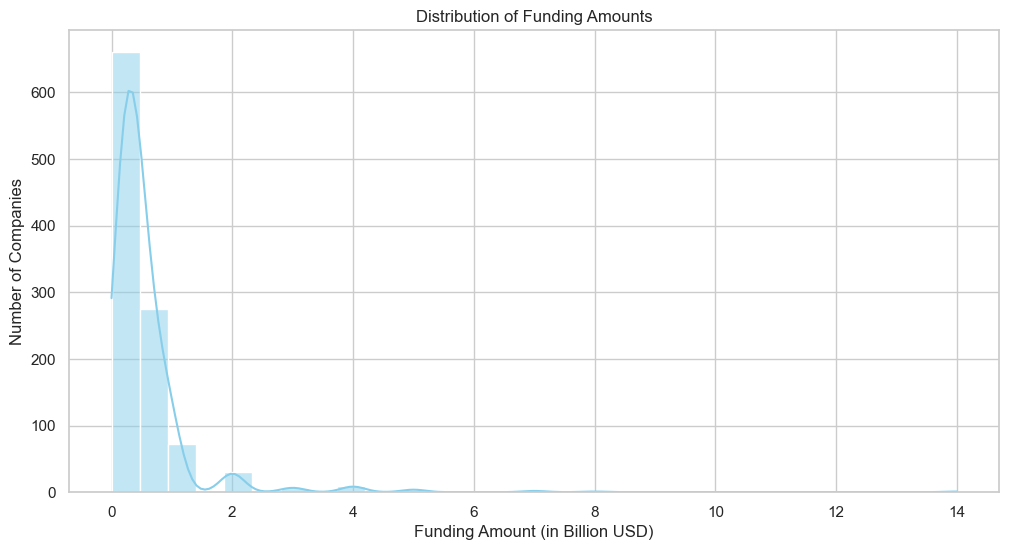

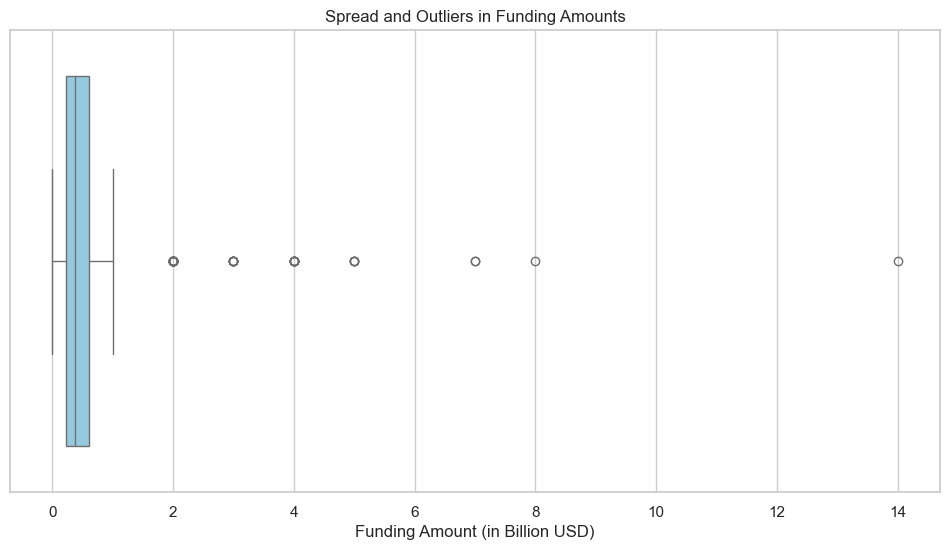

In [24]:
# Set the style for the plots
sns.set(style="whitegrid")

# Histogram: Distribution of Funding Amounts
plt.figure(figsize=(12, 6))
sns.histplot(unicorn_data['Funding'].dropna() / 1e9, bins=30, kde=True, color='skyblue')
plt.xlabel('Funding Amount (in Billion USD)')
plt.ylabel('Number of Companies')
plt.title('Distribution of Funding Amounts')
plt.show()

# Box Plot: Spread and Outliers in Funding Amounts
plt.figure(figsize=(12, 6))
sns.boxplot(x=unicorn_data['Funding'].dropna() / 1e9, color='skyblue')
plt.xlabel('Funding Amount (in Billion USD)')
plt.title('Spread and Outliers in Funding Amounts')
plt.show()

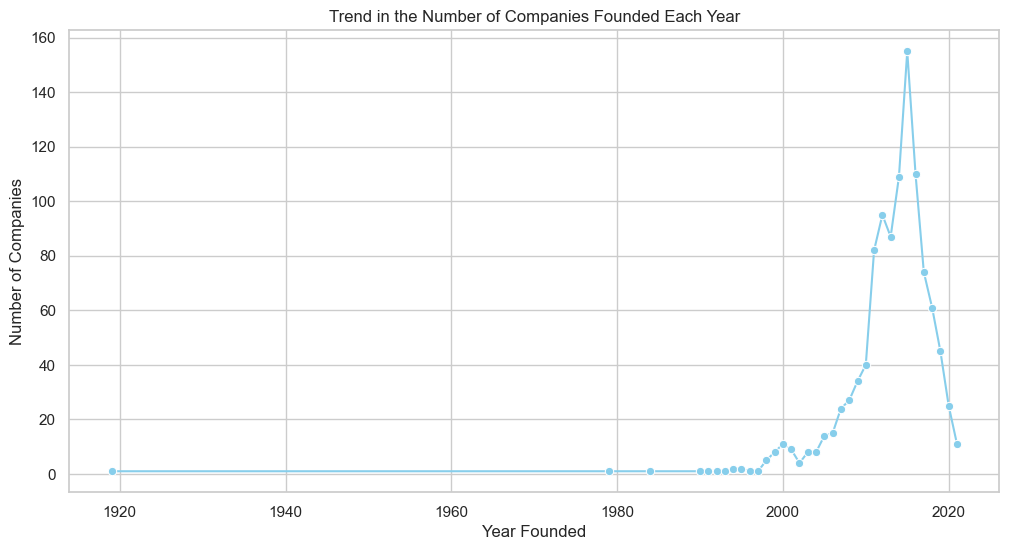

In [26]:
sns.set(style="whitegrid")

# Temporal Analysis: Number of Companies Founded per Year
companies_founded_per_year = unicorn_data['Year Founded'].value_counts().sort_index()

# Line Chart: Number of Companies Founded per Year
plt.figure(figsize=(12, 6))
sns.lineplot(x=companies_founded_per_year.index, y=companies_founded_per_year.values, marker='o', color='skyblue')
plt.xlabel('Year Founded')
plt.ylabel('Number of Companies')
plt.title('Trend in the Number of Companies Founded Each Year')
plt.show()

C:\Users\stann\AppData\Local\Temp\ipykernel_8500\4267333776.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




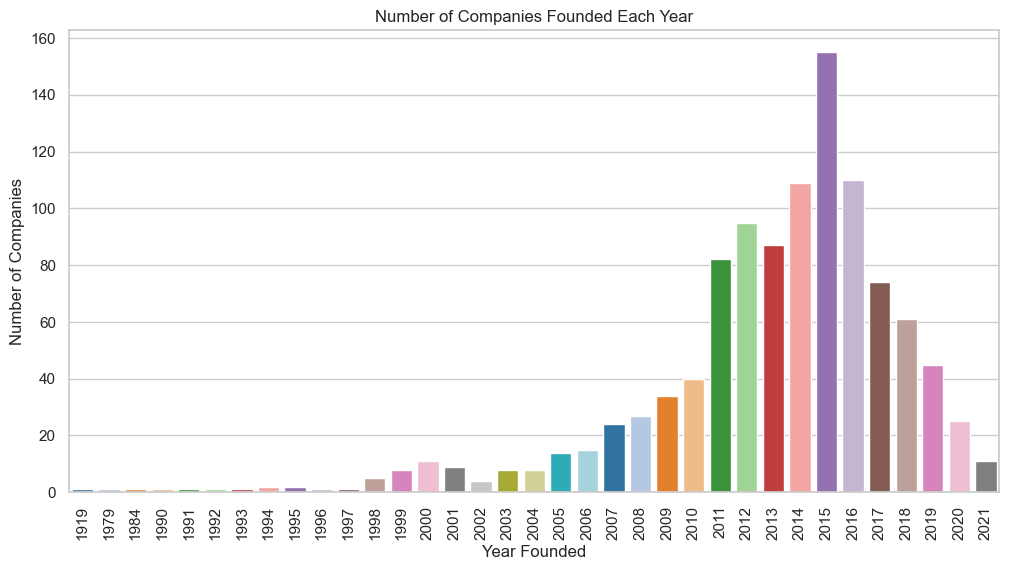

In [27]:
# Bar Chart: Number of Companies Founded per Year
plt.figure(figsize=(12, 6))
sns.barplot(x=companies_founded_per_year.index, y=companies_founded_per_year.values, palette='tab20')
plt.xlabel('Year Founded')
plt.ylabel('Number of Companies')
plt.title('Number of Companies Founded Each Year')
plt.xticks(rotation=90)
plt.show()

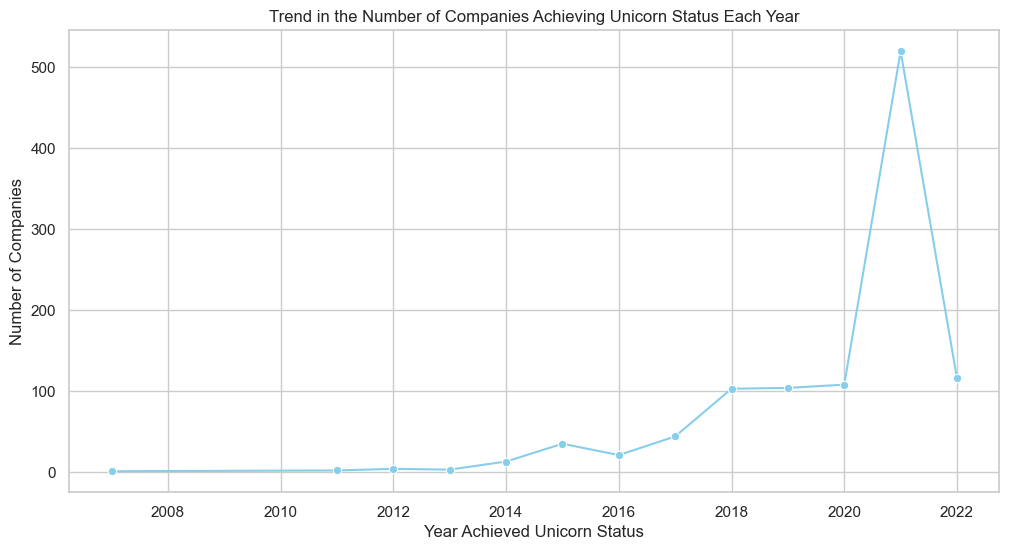

In [28]:
# Temporal Analysis: Number of Companies Achieving Unicorn Status per Year
companies_unicorn_per_year = unicorn_data['Date Joined'].dt.year.value_counts().sort_index()

# Line Chart: Number of Companies Achieving Unicorn Status per Year
plt.figure(figsize=(12, 6))
sns.lineplot(x=companies_unicorn_per_year.index, y=companies_unicorn_per_year.values, marker='o', color='skyblue')
plt.xlabel('Year Achieved Unicorn Status')
plt.ylabel('Number of Companies')
plt.title('Trend in the Number of Companies Achieving Unicorn Status Each Year')
plt.show()

C:\Users\stann\AppData\Local\Temp\ipykernel_8500\1542498885.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




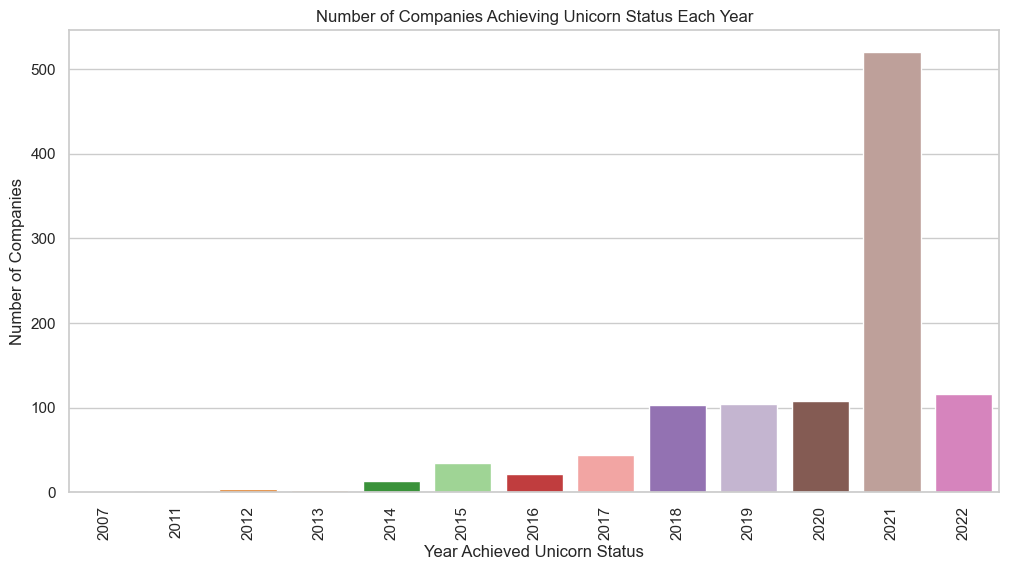

In [29]:
# Bar Chart: Number of Companies Achieving Unicorn Status per Year
plt.figure(figsize=(12, 6))
sns.barplot(x=companies_unicorn_per_year.index, y=companies_unicorn_per_year.values, palette='tab20')
plt.xlabel('Year Achieved Unicorn Status')
plt.ylabel('Number of Companies')
plt.title('Number of Companies Achieving Unicorn Status Each Year')
plt.xticks(rotation=90)
plt.show()